In [1]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [2]:
# To add your own Drive Run this cell.
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/Users/Vincent 1/Downloads/regression_train.csv'
test_path = '/Users/Vincent 1/Downloads/regression_test.csv'
### ========== TODO : END ========== ###

In [4]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [6]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [7]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [12]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        Phi = X
        m = self.m_
        Phi = np.ones((n,m+1))
        for i in range(n):
            pVec = []
            for j in range(m+1):
                pVec.append(X[i]**j)
            Phi[i,:] = pVec
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(t+1) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            theta = 0
            for i in range(n):
              pred = np.dot(X[i],self.coef_)
              theta+= (pred-y[i])*X[i]
            self.coef_ -= 2*eta*theta; 
            y_pred = np.dot(X,self.coef_) # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = np.dot(np.linalg.pinv(X), y)
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X,self.coef_)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        pred = self.predict(X)
        cost = sum((y-pred)*(y-pred))
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n, d = X.shape
        error = np.sqrt(self.cost(X,y)/n)
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...


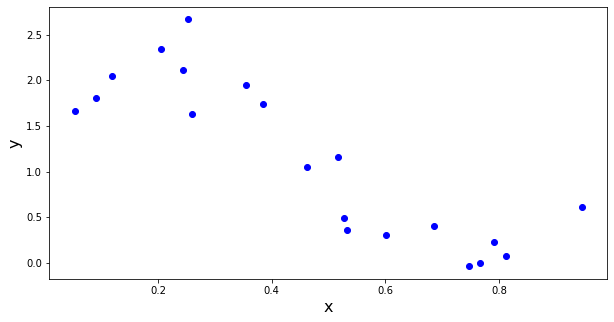

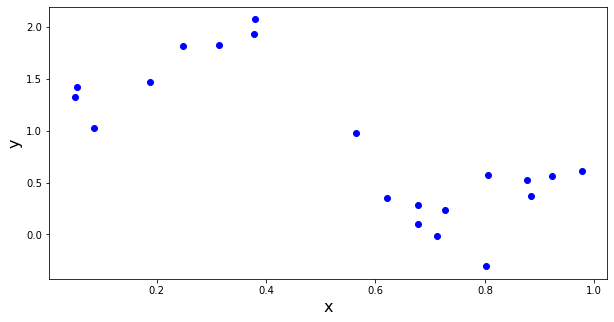

Investigating linear regression...
40.233847409671
number of iterations: 10000
	-- Coefficients with r = 0.000 : [0.36400847 0.09215787]
	-- Cost 25.863 :
number of iterations: 10000
	-- Coefficients with r = 0.000 : [ 1.15699657 -0.22522908]
	-- Cost 13.159 :
number of iterations: 7020
	-- Coefficients with r = 0.001 : [ 2.4464068 -2.816353 ]
	-- Cost 3.913 :
number of iterations: 456
	-- Coefficients with r = 0.017 : [ 2.44640704 -2.81635348]
	-- Cost 3.913 :
number of iterations: 1356
	-- Coefficients with None: [ 2.44640676 -2.81635292]
	-- Cost 3.913 :
Closed form solution: [ 2.44640709 -2.81635359]
	-- Cost 3.913 :
Investigating polynomial regression...


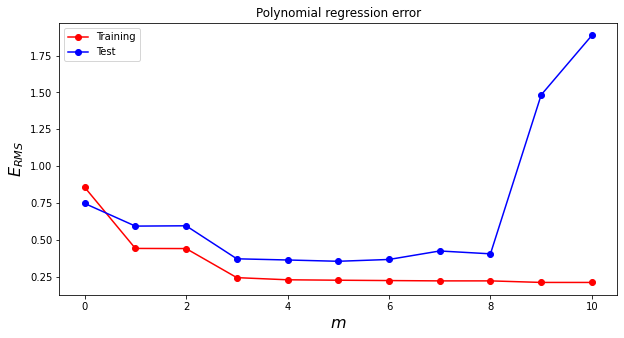

[0.8570606234439588, 0.4422994690134425, 0.441314965682919, 0.2442692189841874, 0.22968276125805676, 0.22681133051783145, 0.22445294828005144, 0.2222819395206686, 0.22226057495949136, 0.2117787979245398, 0.21167931072386734]
[0.7472683641851717, 0.5935949636028282, 0.5957110445316901, 0.3719429761720436, 0.36393172002168134, 0.35513774288407995, 0.3674501691751674, 0.42500830624629893, 0.4056685044093461, 1.4830241974171439, 1.8866422431901815]
Done!


In [13]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    x_train, y_train = train_data.X, train_data.y
    x_test, y_test = test_data.X, test_data.y
    plot_data(x_train, y_train)
    plot_data(x_test, y_test)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression (m=1) 
    model.coef_ = np.zeros(2)
    print(model.cost(train_data.X, train_data.y))
    LRate = [10**-6,10**-5,10**-3, 0.0168]
    for r in LRate:
       model.fit_GD(x_train,y_train,eta=r)
       print('\t-- Coefficients with r = %.3f :' % r, model.coef_)
       print('\t-- Cost %.3f :' % model.cost(x_train,y_train))
    model.fit_GD(x_train,y_train,eta=None)
    print('\t-- Coefficients with None:', model.coef_)
    print('\t-- Cost %.3f :' % model.cost(x_train,y_train))
    model.fit(x_train,y_train)
    print('Closed form solution:', model.coef_)
    print('\t-- Cost %.3f :' % model.cost(x_train,y_train))
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    testRMS = []
    trainRMS = []
    mNum = []
    for n in range(11):
      model = model = PolynomialRegression (m=n)
      model.fit(x_train,y_train)
      trainRMS.append(model.rms_error(x_train,y_train))
      testRMS.append(model.rms_error(x_test,y_test))
      mNum.append(n)
    plot_erms(mNum, trainRMS, testRMS) 
    print(trainRMS)
    print(testRMS)
    ### ========== TODO : END ========== ###
    
    
    print("Done!")
   

if __name__ == "__main__":
    main()
